In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [2]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [3]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                selectivity_average = ast.literal_eval(line)
            if i == 2:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [4]:
def sparsity_val_extractor(file_name):
    sparsity_average = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                sparsity_average = ast.literal_eval(line)
    return sparsity_average

In [7]:
def all_plotter(original_test, original_sparsity, original_selectivity, conv_test, conv_sparsity, conv_selectivity, location='best'):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    ax.plot(np.linspace(0.0, 5.0, num=5), original_test[:5], label='original_test')
    ax.plot(np.linspace(0.0, 5.0, num=5), original_sparsity[:5], label='original_sparsity')
    ax.plot(np.linspace(0.0, 5.0, num=5), original_selectivity[:5], label='original_selectivity')
    
    ax.plot(np.linspace(0.0, 5.0, num=5), conv_test, label='conv_test')
    ax.plot(np.linspace(0.0, 5.0, num=5), conv_sparsity, label='conv_sparsity')
    ax.plot(np.linspace(0.0, 5.0, num=5), conv_selectivity, label='conv_selectivity')
    
    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

# Adadelta

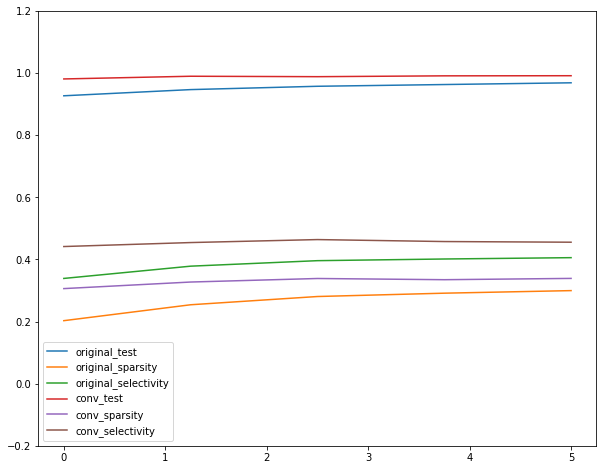

In [8]:
ori_ta = test_val_extractor("original_selectivity_Adadelta.txt")
ori_sparsity = sparsity_val_extractor("original_sparsity_Adadelta.txt")
ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor("original_selectivity_Adadelta.txt")

conv_ta = test_val_extractor("conv_selectivity_Adadelta.txt")
conv_sparsity = sparsity_val_extractor("conv_sparsity_Adadelta.txt")
conv_selectivity_avg, conv_selectivity_std = selectivity_val_extractor("conv_selectivity_Adadelta.txt")

all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, conv_ta, conv_sparsity, conv_selectivity_avg)

# Adagrad

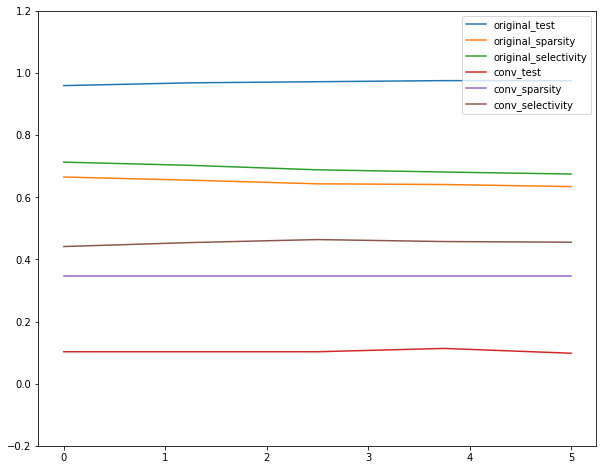

In [10]:
ori_ta = test_val_extractor("original_selectivity_Adagrad.txt")
ori_sparsity = sparsity_val_extractor("original_sparsity_Adagrad.txt")
ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor("original_selectivity_Adagrad.txt")

conv_ta = test_val_extractor("conv_sparsity_Adagrad.txt")
conv_sparsity = sparsity_val_extractor("conv_sparsity_Adagrad.txt")
conv_selectivity_avg, conv_selectivity_std = selectivity_val_extractor("conv_selectivity_Adadelta.txt")

all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, conv_ta, conv_sparsity, conv_selectivity_avg)

# SGD

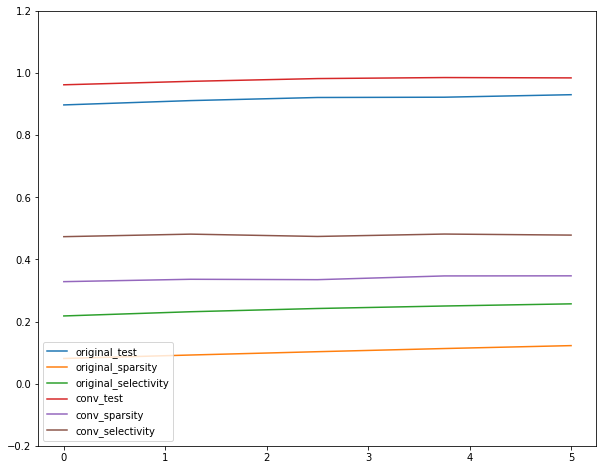

In [11]:
ori_ta = test_val_extractor("original_selectivity_SGD.txt")
ori_sparsity = sparsity_val_extractor("original_sparsity_SGD.txt")
ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor("original_selectivity_SGD.txt")

conv_ta = test_val_extractor("conv_selectivity_SGD.txt")
conv_sparsity = sparsity_val_extractor("conv_sparsity_SGD.txt")
conv_selectivity_avg, conv_selectivity_std = selectivity_val_extractor("conv_selectivity_SGD.txt")

all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, conv_ta, conv_sparsity, conv_selectivity_avg)

# Adam

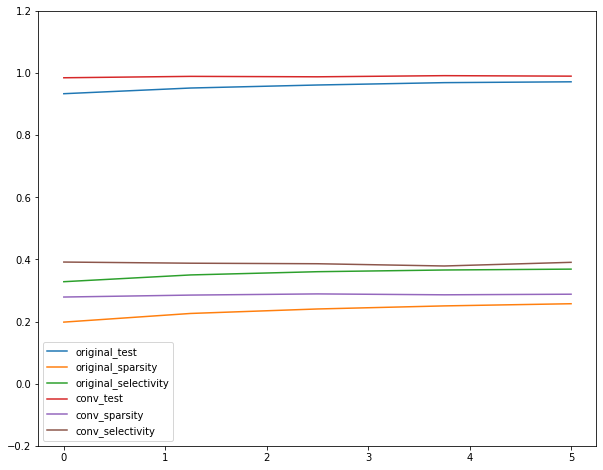

In [12]:
ori_ta = test_val_extractor("original_selectivity_Adam.txt")
ori_sparsity = sparsity_val_extractor("original_sparsity_Adam.txt")
ori_selectivity_avg, ori_selectivity_std = selectivity_val_extractor("original_selectivity_Adam.txt")

conv_ta = test_val_extractor("conv_selectivity_Adam.txt")
conv_sparsity = sparsity_val_extractor("conv_sparsity_Adam.txt")
conv_selectivity_avg, conv_selectivity_std = selectivity_val_extractor("conv_selectivity_Adam.txt")

all_plotter(ori_ta, ori_sparsity, ori_selectivity_avg, conv_ta, conv_sparsity, conv_selectivity_avg)